# Delays por mes

1. Correr `run_all_get_delays_month.sh`
2. Compilar el proyecto
3. Listar todos los datos preprocesados
4. CML!
5. Graficar y comparar
6. Calcular RMSE

In [1]:
# 1. correr local

In [2]:
# 2.
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home2/clinux01/.pyenv/versions/tp3/bin/python3 (found version "3.6.5") 
-- Found PythonLibs: /home2/clinux01/.pyenv/versions/3.6.5/lib/libpython3.6m.a
-- pybind11 v2.4.dev4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home2/clinux01/tp3
-- Configuring done
--

In [30]:
# 3. listando los datos
import numpy as np

data = np.matrix(
    [
        [363497, 101263, 75937, 71455, 53984, 77751, 91174, 73281, 51912, 63241, 82429, 92645], #1994
        [439356, 88226, 95541, 82464, 86632, 105719, 89606, 92149, 61954, 80228, 94600, 142843], #1995
        [519396, 118091, 108184, 86422, 94651, 112313, 113297, 117013, 93412, 104171, 96095, 152186], #1996
        [443363, 103023, 100965, 90146, 77029, 107568, 105038, 100019, 66527, 84743, 94237, 119329], #1997
        [391213, 101589, 111011, 92414, 101170, 132069, 97768, 107005, 93502, 83598, 72963, 121889], #1998
        [430139, 88189, 102401, 109616, 110327, 134221, 137235, 114595, 95080, 95406, 84562, 103411], #1999
        [549320, 118875, 111273, 114192, 123360, 158602, 143559, 147598, 101447, 116310, 127079, 179217], #2000
        [348179, 130514, 131619, 106513, 98198, 129124, 117823, 129645, 158707, 67561, 63829, 85022], #2001
        [308717, 61262, 95911, 76336, 77608, 95757, 94676, 81101, 51809, 70672, 61403, 92497], #2002
        [406561, 117525, 97467, 69367, 80461, 94627, 113620, 116952, 75849, 75206, 104578, 133121], #2003
        [559393, 125246, 112518, 98892, 133045, 159248, 147712, 135272, 94163, 115906, 122073, 172532], #2004
        [563842, 126326, 142528, 98554, 100427, 151090, 182635, 156700, 99589, 111147, 113099, 165981], #2005
        [605748, 131672, 144541, 126351, 130988, 162580, 163384, 152139, 139088, 165701, 137620, 176618], #2006
        [647216, 185521, 170854, 149346, 139654, 201002, 196006, 185259, 109906, 137320, 120851, 219063], #2007
        [523610, 178984, 175120, 133580, 127213, 177470, 152558, 132010, 81885, 77654, 87227, 188861] #2008
    ]
)

### 4. CML!

Vamos a empezar probando algunas cositas.

Primero hacemos CML en cada año por si mismo y calculo su RMSE

$
RMSE(f) = \sqrt{\frac{1}{N}\sum_{i=0}^N e^2_{(i)}} \\
e(i) =y(i)−yˆ(i)
$

Para empezar probamos con una cuadratica...

In [50]:
import predict
import math

def cuadratica(x):
    return np.array([1, x, x*x]);

cml = predict.CML(cuadratica, 3)

N = 12
x = np.arange(1, N+1)

x_axis = []
rmses = []

for i in range(len(data)):
    x_axis.append(1994 + i)
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    rmse = rmse / (max(y) - min(y))
    
    rmses.append(rmse)

TypeError: Required argument 'object' (pos 1) not found

<BarContainer object of 15 artists>

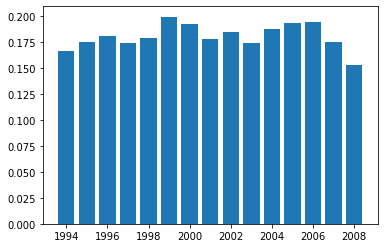

In [44]:
import matplotlib.pyplot as plt

plt.bar(x_axis, rmses)

Como sabemos que el primer mes es mayor al resto probamos inlcuyendo la funcion $\frac{1}{x}$

In [54]:
def cuadratica_con_inver(x):
    return np.array([1, x, x*x, 1/x]);

cml = predict.CML(cuadratica_con_inver, 4)

rmses_2 = []

for i in range(len(data)):
    y = np.asarray(data[i]).reshape(-1)

    cml.fit(x, y)
    
    e = []
    for j in range(N):
        e.append(y[j] - cml.predict(x[j]))
    
    rmse = 0
    for j in range(len(e)):
        rmse += e[j] ** 2
    rmse = rmse/N
    rmse = math.sqrt(rmse)
    
    rmse = rmse / (max(y) - min(y))
    
    rmses_2.append(rmse)

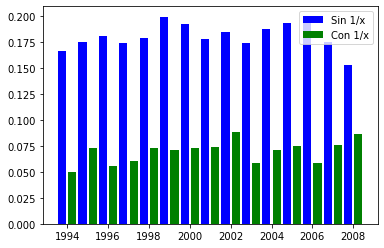

In [55]:
plt.clf()


X = np.array(x_axis)
p1 = plt.bar(X - 0.25, rmses, color = 'b', width = 0.40)
p2 = plt.bar(X + 0.25, rmses_2, color = 'g', width = 0.40)

plt.legend((p1[0], p2[0]), ('Sin 1/x', 'Con 1/x'))

plt.show()

Justo lo que estabamos buscando! Esta parece ser una funcion que aproxima muy muy bien a la cantidad de delays por mes.

Para seguir viendo el estudio de esto ir a meses_futuros.ipynb